# Financial Derivatives Group Project (35 points of final grade)
In this assignment, you will have to answer questions by adding codes or markdowns in the cells provided.

### Question 1: simulate price path using the geometric Brownian motion [2 points]

The logarithm stock price under the geometric Brownian motion is given by:

$ S_{t} = S_{0}e^{(\mu - \frac{1}{2}\sigma^{2})t + \sigma{\epsilon\sqrt{t}}} $

where $\epsilon \sim \mathcal{N}(0,1)$.

Using the following parameters:

$ \mu = 0.1 $

$ N = 100 $

$ T = 10 $

$ dt = 10/100 = 0.1 $

$ S_0 = 100 $

**Simulate** price paths for $\sigma = 0, \sigma = 0.1, \sigma = 0.2$ using a random seed of 5 and *plot them on a diagram.

**Answer in the box below:**

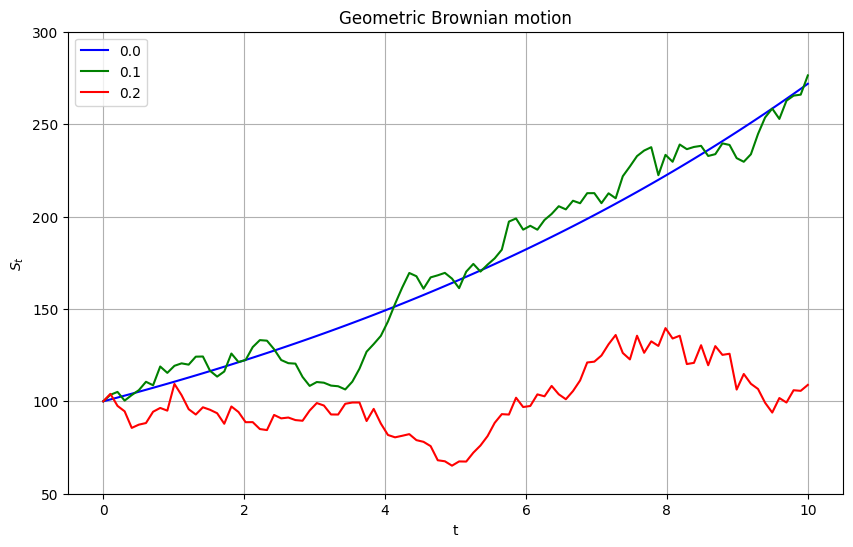

In [10]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(5)

# Params
mu = 0.1      # drift
N = 100       # number of time steps
T = 10        # total time
dt = T/N      # time step size
S0 = 100      # initial stock price
t = np.linspace(0, T, N)  # time points

def simulate_gbm(S0, mu, sigma, T, N):
    dt = T/N
    t = np.linspace(0, T, N)
    epsilon = np.random.normal(0, 1, N)  # random normal variables
    
    # Initialize array for stock price
    S = np.zeros(N)
    S[0] = S0
    
    # Calculate price path
    for i in range(1, N):
        S[i] = S0 * np.exp((mu - 0.5 * sigma**2) * t[i] + sigma * np.sum(epsilon[:i]) * np.sqrt(dt))
    
    return S

# Simulate paths for different sigma values
sigma_values = [0.0, 0.1, 0.2]
colors = ['blue', 'green', 'red']

plt.figure(figsize=(10, 6))

# Plot each path
for sigma, color in zip(sigma_values, colors):
    S = simulate_gbm(S0, mu, sigma, T, N)
    plt.plot(t, S, color=color, label=f'{sigma:.1f}')

# Customize the plot
plt.title('Geometric Brownian motion')
plt.xlabel('t')
plt.ylabel('$S_t$')
plt.legend()
plt.grid(True)

plt.ylim(50, 300)

plt.show()

You should replicate the diagram below:
<img src="gbm.png">

### Question 2: applying the Itô's lemma [2 points]

Given the following Itô process:

$ dX_{t} = dW_{t} $ 

Apply the **Itô's lemma** to the following function:

$ f(X) = e^{2X} $


**Please fill in your answers below:**

$              $

$              $

$              $

### Question 3: applying the Itô's product rule [2 points]

Given the following three Itô processes for asset $X$, asset $Y$, and asset $Z$ respectively:

$ dX_{t} = \mu_{x}X_{t}dt + \sigma_{x}X_{t}dW^{x}_{t} $

$ dY_{t} = \mu_{y}Y_{t}dt + \sigma_{y}Y_{t}dW^{y}_{t} $

$ dZ_{t} = \mu_{z}Z_{t}dt + \sigma_{z}Z_{t}dW^{z}_{t} $

where $ dW^{x}_{t} $,  $ dW^{y}_{t} $, and $ dW^{z}_{t} $ are Brownian motions for asset $X$, asset $Y$, and asset $Z$ respectively with correlations $ \rho_{x,y} $ between $X$ and $Y$,  $ \rho_{x,z} $ between $X$ and $Z$, and $ \rho_{y,z} $ between $Y$ and $Z$.

Find the **differential** for the following function:

$ f(X,Y,Z) = X_{t}(Y_{t} + Z_{t}) $

**Please fill in your answers below:**

$ df(X, Y, Z) = $

$              $

$              $

### Question 4: change of measure [2 points]

Given the following geometric Brownian motion with a risk-neutral drift term:

$ dS_{t} = rS_{t}dt + \sigma{S}_{t}dW^{\mathbb{Q}}_{t} $

a) Show that under measure $\mathbb{M}$, we can re-express the above dynamics into a **stochastic process with no drift**:

$ dS_{t} =\sigma{S}_{t}dW^{\mathbb{M}}_{t} $

b) Find the **Radon-Nikodym derivative** for changing the measure from $\mathbb{Q}$ to $\mathbb{M}$.

**Please fill in your answers below:**

$              $

$              $

$              $

### Question 5: Convergence of Binomial Option Pricing Model (3 points)

In this part, you will need the following two functions:
1. Binomial Option Pricing Model for pricing an European call option
2. Black-Scholes-Merton (BSM) Model for an European call option

Next, you have to write a for loop to loop over the number of steps in the binomial tree. 

Finally, plot binomical call prices computed with different numbers of steps versus the BSM call price. An example output is attached below.

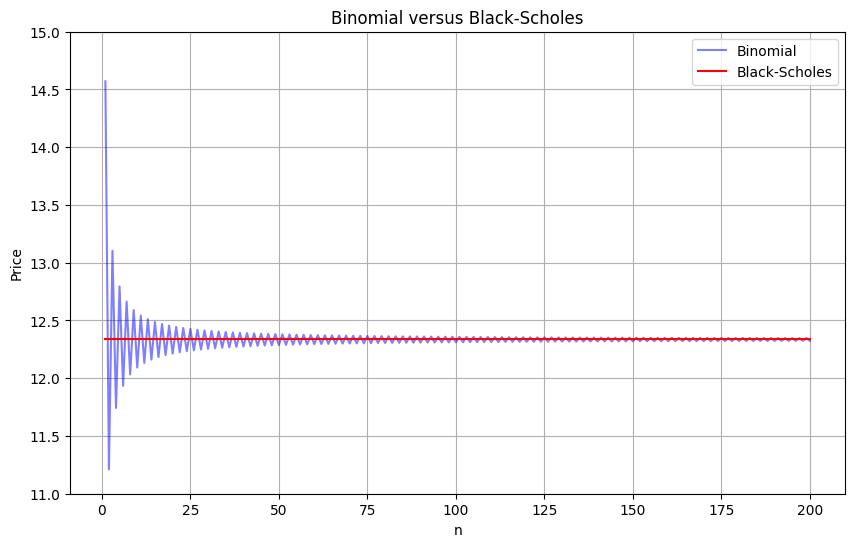

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math as m

# Given parameters
S = 100    # Stock price
K = 100    # Strike price
v = 0.25   # Volatility
r = 0.05   # Risk-free rate
T = 1      # Time to maturity

def black_scholes_call(S, K, T, r, v):
    """Calculate Black-Scholes call option price"""
    d1 = (np.log(S/K) + (r + v**2/2)*T) / (v*np.sqrt(T))
    d2 = d1 - v*np.sqrt(T)
    
    call = S*stats.norm.cdf(d1) - K*np.exp(-r*T)*stats.norm.cdf(d2)
    return call

def binomial_call(S, K, T, r, v, n):
    """Calculate Binomial Model call option price"""
    dt = T/n
    u = np.exp(v*np.sqrt(dt))
    d = 1/u
    p = (np.exp(r*dt) - d)/(u - d)  # risk netural prob 
    
    # Initialize asset prices at maturity
    prices = np.zeros(n+1)
    for j in range(n+1):
        prices[j] = S * (u**(n-j)) * (d**j)
    
    # Initialize option values at maturity
    values = np.maximum(prices - K, 0)
    
    # Backward recursion through the tree
    for i in range(n-1, -1, -1):
        for j in range(i+1):
            values[j] = np.exp(-r*dt) * (p*values[j] + (1-p)*values[j+1])
    
    return values[0]

# Generate data points for comparison
n_values = np.arange(1, 201)  # Number of steps from 1 to 200
binomial_prices = [binomial_call(S, K, T, r, v, n) for n in n_values]
bs_price = black_scholes_call(S, K, T, r, v)
all_bs_price = [bs_price] * len(n_values)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot binomial prices in blue
plt.plot(n_values, binomial_prices, 'b-', alpha=0.5, label='Binomial')

# Plot Black-Scholes price in red
plt.plot(n_values, all_bs_price, 'r-', label='Black-Scholes')

plt.title('Binomial versus Black-Scholes')
plt.xlabel('n')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Set y-axis limits to match the example
plt.ylim(11, 15)

plt.show()

Your output should be similar to:

<img src="binomial_convergence.png"  style="width: 500px;"/>

### Question 6: Stairway bull spread (6 points)

#### (a) Replicate the following payoff diagram [1 out of 6 points]

<img src="stairway1.png"  style="width: 500px;"/>

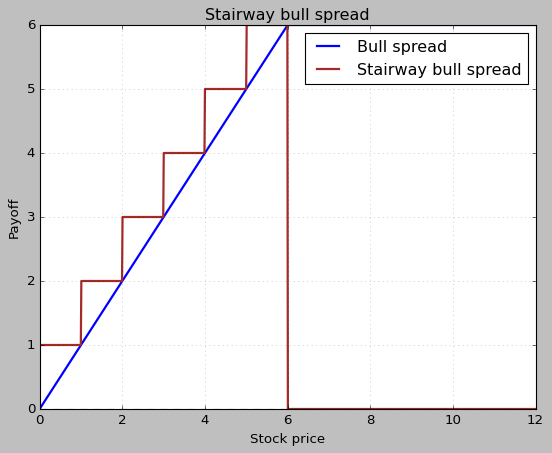

Bull spread price: 5.0000
Stairway bull spread price: 5.0049


In [33]:
""" skipp ofr now """


import numpy as np
import matplotlib.pyplot as plt

def stairway_bull_spread(S, step_size, num_steps):
    """Calculate stairway bull spread payoff."""
    payoff = np.zeros_like(S)
    strike_levels = np.linspace(0, step_size * num_steps, num_steps + 1)

    for i in range(len(strike_levels) - 1):
        payoff += np.where((S >= strike_levels[i]) & (S < strike_levels[i + 1]),
                           (i + 1) * step_size, 0)

    return np.clip(payoff, 0, step_size * num_steps)

# Parameters
S = np.linspace(0, 12, 1000)
num_steps = 6  # Number of steps for the stairway
step_size = 1  # Step size per interval

# Payoffs
stairway_payoff = stairway_bull_spread(S, step_size, num_steps)
bull_spread_payoff = np.clip(S, 0, step_size * num_steps)

# Plotting
plt.style.use('classic')
plt.figure(figsize=(8, 6))
plt.plot(S, bull_spread_payoff, label="Bull spread", color="blue", linewidth=2)
plt.plot(S, stairway_payoff, label="Stairway bull spread", color="brown", linewidth=2)

# Chart customization
plt.title("Stairway bull spread")
plt.xlabel("Stock price")
plt.ylabel("Payoff")
plt.axhline(0, color='black', linestyle='--', linewidth=1, alpha=0.7)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Analytical calculation of prices
num_steps_analytic = 1000
step_size_analytic = 0.01
S_fine = np.linspace(0, 10, 100000)
stairway_payoff_analytic = stairway_bull_spread(S_fine, step_size_analytic, num_steps_analytic)
bull_spread_payoff_analytic = np.clip(S_fine, 0, step_size_analytic * num_steps_analytic)

# Calculate average prices
price_bull_spread = np.mean(bull_spread_payoff_analytic)
price_stairway_spread = np.mean(stairway_payoff_analytic)

print(f"Bull spread price: {price_bull_spread:.4f}")
print(f"Stairway bull spread price: {price_stairway_spread:.4f}")


#### (b) Modify your code in (a) to allow user changing the number of steps in the stairway bull spread [2 out of 6 points]

#### For a step size of 1 (6 steps in total), your output should be similar to:
<img src="stairway2.png" style="width: 500px;"/>

In [4]:
### your code for 6(b) ###




##########################

#### (c) After increasing the number of steps in the stairway bull spread to 1000, compute the price of the bull spread and the price of the stairway bull spread analytically [3 out of 6 points]

In [5]:
S = 5 # stock price
r = 0.05 # risk free rate
T = 1 # time to maturity
v = 0.25 # volatility

### your code for 6(c) ###



##########################

##### Your output should be:

Bull spread: **3.0681**

Stairway bull spread: **3.0654**

<img src="stairway3.png" style="width: 500px;"/>

***

## Question 7: Black-Scholes-Merton European Put Option Formula (2 points)

$P_{0} = K\exp^{-rT}\mathcal{N}(-d_2) - S_{t}\mathcal{N}(-d_1)$ 

$d_1 = \frac{\ln(\frac{S_0}{K}) + (r + \frac{1}{2}\sigma^2)T}{\sigma\sqrt{T}}$

$d_2 = d_1 - \sigma\sqrt{T}$

Derive the above **European put option** formula under the **martingale pricing approach**:

**Please fill in your answers below:**

$              $

$              $

$              $

## Question 8: Charm (Delta Decay) (2 points)

Charm (Delta Decay) of a derivative captures the instantaneous change of **delta** over **time**.

$ \text{Charm} = - \frac{\partial\Delta}{\partial\tau} = \frac{\partial\theta}{\partial S} = \frac{\partial^2 V}{\partial\tau \partial S} $

Using the **Black-Scholes-Merton** formula and letting $\tau = T- t$, derive the following Charm formula for **European Call Option**:

$ \text{Charm}_{c} = -\mathcal{N}'(d_1)\left[\frac{2r\tau - \sigma\sqrt{\tau}d_2}{2\sigma\tau\sqrt{\tau}} \right]$

**Please fill in your answers below:**

$              $

$              $

$              $

In [6]:
%%html
<style> table {float:left} </style>

## Question 9: Hedging a Portfolio of Options (2 points)

A bank has the following outstanding OTC options exposures on a particular underlying asset:

| Options | Position | Delta | Gamma | Vega |
| :- | -: | -: | -: | -: |
| Call | -1000 | 0.5 | 2.2 | 1.8 |
| Call | -500 | 0.8 | 0.6 | 0.2 |
| Put | -2000 | -0.4 | 1.3 | 0.7 |
| Call | -500 | 0.7 | 1.8 | 1.4 |

One **exchange traded option** on the same underlying asset has a Delta of 0.6, a Gamma of 1.5, and a Vega of 0.8.

Another **exchange traded option** on the same underlying asset has a Delta of 0.1, a Gamma of 0.5, and a Vega of 0.6.

You have to implement a **Delta-Gamma-Vega** hedge for this bank's option portfolio. 

How many units of the **exchange traded option** and the **underlying asset** you have to buy/sell to **remove exposures towards all three option Greeks**?

**Please fill in your answers below:**

$              $

$              $

$              $

## Question 10: Monte Carlo Simulation for Pricing Barrier Options (4 points)

In [35]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(5)

nsim = 500

nstep = 260 # trading days in a year
T = 1
dt = T/nstep

r = 0.05
sigma = 0.25
S_0 = 100

e = np.random.normal(loc=0.0, scale=1.0, size=(nsim,nstep))

S_t = S_0*np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * e).cumprod(axis=1)

#### (a) Knock-in Up and In Call Option [2 out of 4 points]

$ H = 110 $

$ K = 120 $

If $ S_\tau > H $, the call option is activated.

You should get **5.9656**.

In [37]:
### your code for 10(a) ###

H = 110
K = 120

# Identify the paths where the stock price hits the barrier
barrier_hit = np.any(S_t > H, axis=1)

# Calculate the payoff for the paths where the barrier is hit
payoff = np.maximum(S_t[:, -1] - K, 0) * barrier_hit

# Calculate the option price
call_price = np.mean(np.exp(-r * T) * payoff)

print("Knock-in Up and In Call Option Price:", round(call_price, 4))



Knock-in Up and In Call Option Price: 5.9656


#### (b) Knock-out Down and Out Put Option [2 out of 4 points]

$ H = 90 $

$ K = 100 $

If $ S_\tau < H$, the put option is expired.

You should get **0.1056**.

In [39]:
### your code for 10(b) ###

H = 90
K = 100

# Identify the paths where the stock price hits the barrier
barrier_hit = np.any(S_t < H, axis=1)

# Calculate the payoff for the paths where the barrier is not hit ( by ~ )
payoff = np.maximum(K - S_t[:, -1], 0) * ~barrier_hit

# Calculate the option price
put_price = np.mean(np.exp(-r * T) * payoff)

print("Knock-out Down and Out Put Option Price:", round(put_price, 4))



Knock-out Down and Out Put Option Price: 0.1056


### Question 11: Convergence of Monte Carlo Option Pricing Model (2 points)

In this part, you will need the following:
1. A procedure of pricing derivatives with Monte Carlo stimulation
2. A function of Black-Scholes-Merton (BSM) Model for an European call option

Next, you have to write a for loop to loop over the **number of simulations** in the Monte Carlo procedure. 

Finally, plot Monte Carlo call prices computed with different numbers of steps versus the BSM call price. An example output is attached below.


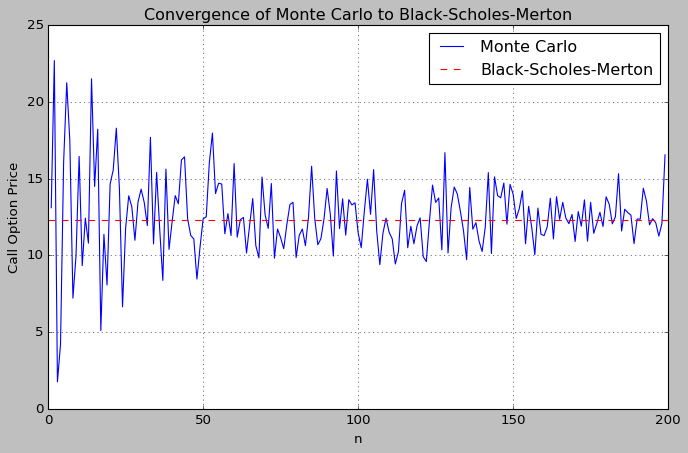

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(5)

# Parameters
S = 100
K = 100
v = 0.25
r = 0.05
T = 1

# Black-Scholes-Merton (BSM) call option price
def bsm_call(S, K, r, v, T):
    d1 = (np.log(S/K) + (r + v**2/2)*T) / (v*np.sqrt(T))
    d2 = d1 - v*np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r*T) * norm.cdf(d2)

# Monte Carlo call option price
def mc_call(S, K, r, v, T, n_sims):
    dt = T / n_sims
    z = np.random.normal(0, 1, (n_sims, n_sims))
    S_t = S * np.exp((r - 0.5*v**2)*dt + v*np.sqrt(dt)*z).cumprod(axis=1)
    return np.exp(-r*T) * np.mean(np.maximum(S_t[:, -1] - K, 0))

# Plot convergence
n_sims_list = np.arange(1, 200, 1)
mc_prices = [mc_call(S, K, r, v, T, n) for n in n_sims_list]
bsm_price = bsm_call(S, K, r, v, T)

plt.figure(figsize=(10, 6))
plt.plot(n_sims_list, mc_prices, label='Monte Carlo')
plt.axhline(bsm_price, color='r', linestyle='--', label='Black-Scholes-Merton')
plt.xlabel('n')
plt.ylabel('Call Option Price')
plt.title('Convergence of Monte Carlo to Black-Scholes-Merton')
plt.legend()
plt.grid()
plt.show()

Your output should be similar to:

<img src="monte_carlo_convergence.png" style="width: 500px;"/>

### Question 12: Pricing of an exchange option (3 points)

#### (a) Numerical solution [2 out of 3 points]:

The payoff of an exchange option is defined as:

$ V_{\text{exchange},T} =  \max[S_{1,T} - S_{2,T}, 0] $

where $S_{1,T}$ and $S_{2,T}$ are the prices of two underlying assets on the expiration date. In this section, price an exchange option using the Monte Carlo simulation method. You should generate two price processes that are correlated.

In [11]:
import numpy as np
import pandas as pd

np.random.seed(5)

S1 = 50
S2 = 40
V1 = 0.3
V2 = 0.25
Rho = -0.5
r = 0.05
T = 1

n_stk = 2
n_sim = 1000000

### your code for 12(a) below ###





#################################

##### Your output should be:

Monte Carlo Exchange option price:
**14.3612**

#### (b) Analytical solution [1 out of 3 points]:

The analytical pricing formula for an exchange option is:

$V_{\text{exchange},t} = S_{1,t}N(\tilde{d}_1) - S_{2,t}N(\tilde{d}_2)$

where:

$ \tilde{d}_1 = \frac{1}{\tilde{\sigma}\sqrt{T-t}}[\ln(\frac{S_{1}}{S_{2}}) + (\frac{\tilde{\sigma}^2}{2})(T-t)] $

$ \tilde{d}_2  = \tilde{d}_1 - \tilde{\sigma}\sqrt{T-t} $

$ \tilde{\sigma}^2 = \sigma_{1}^2 + \sigma_{2}^2 - 2\rho\sigma_{1}\sigma_{2} $

Please define the pricing function of the analytical formula and compare the result with the Monte Carlo simulation.

In [12]:
### your code for 12(b) below ###





#################################

##### Your output should be:

Analytical Exchange option price:
**14.3722**

## Question 13: Implied volatility (3 points)

The sample code below solves:

$ y = x^3 - 2x^2 + 1 $ and $ y = 10 $

by the **method of bisection**

<div class="alert alert-block alert-success">
<b>Example:</b> 
    
    def f(x):
    y = x**3 - 2*x**2 + 1
    return y

    max_iter = 100
    precision = 1.0e-3

    y_actual = 10
    lg = 0
    ug = 5

    for i in range(0, max_iter):

        ylg = f(lg) - y_actual

        mg = (lg + ug)/2
        y = f(mg) - y_actual


        if (ylg * y) < 0:
            ug = mg
        else:
            lg = mg

        print('*** This is loop #'+str(i)+' ***')
        print('The guess for x is ' + str(round(mg,3)) + ' and the y value is ' + str(round(y,3)))

        if (abs(y) < precision):
            break # end the loop
</div>

**Modify** the above **method of bisection** code to find the implied volatility of an **European call option** with the **Black-Scholes-Merton** call price of **\$3.743**.

The model parameters are as follows:
- S = 13
- K = 10
- r = 0.05
- T = 1

In [51]:
### your code below ###

import numpy as np
from scipy import stats

def BS_call(S, K, r, T, v):
    d1 = (np.log(S/K) + (r + 0.5 * v**2)*T)/(v * np.sqrt(T))
    d2 = d1 - v * np.sqrt(T)
    Call = S * stats.norm.cdf(d1,0.0,1.0) - K * np.exp(-r*T) * stats.norm.cdf(d2,0.0,1.0)
    return Call

def find_implied_volatility(S, K, r, T, c_actual):
    max_iter = 100
    precision = 1.0e-3

    lg = 0.01
    ug = 1.0

    for i in range(0, max_iter):
        mg = (lg + ug) / 2
        c = BS_call(S, K, r, T, mg)
        diff = c - c_actual

        print(f'*** This is loop #{i} ***')
        print(f'The guess for volatility is {round(mg, 3)} and the call price is {round(c, 3)}')

        if abs(diff) < precision:
            return mg

        if c > c_actual:
            ug = mg
        else:
            lg = mg

    return None  # Failed to converge

# Test the function
S = 13
K = 10
r = 0.05
T = 1
c_actual = 3.743

implied_vol = find_implied_volatility(S, K, r, T, c_actual)

if implied_vol is not None:
    print(f'The implied volatility is: {round(implied_vol, 3)}')
else:
    print('Failed to find the implied volatility')

*** This is loop #0 ***
The guess for volatility is 0.505 and the call price is 4.391
*** This is loop #1 ***
The guess for volatility is 0.258 and the call price is 3.643
*** This is loop #2 ***
The guess for volatility is 0.381 and the call price is 3.975
*** This is loop #3 ***
The guess for volatility is 0.319 and the call price is 3.794
*** This is loop #4 ***
The guess for volatility is 0.288 and the call price is 3.714
*** This is loop #5 ***
The guess for volatility is 0.304 and the call price is 3.753
*** This is loop #6 ***
The guess for volatility is 0.296 and the call price is 3.733
*** This is loop #7 ***
The guess for volatility is 0.3 and the call price is 3.743
The implied volatility is: 0.3
